In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import signal
from rich.pretty import pprint
import mne
from sklearn.preprocessing import MinMaxScaler
from torcheeg.datasets import DREAMERDataset
from torcheeg.datasets.constants.emotion_recognition.dreamer import DREAMER_CHANNEL_LOCATION_DICT
from torcheeg import transforms
from torcheeg.utils import plot_signal

In [2]:
dataset_path = "./DREAMER.mat"
base_path = "./"

In [3]:
DREAMER_CHANNEL_LIST = list(DREAMER_CHANNEL_LOCATION_DICT.keys())

data_info = mne.create_info(
    ch_names=DREAMER_CHANNEL_LIST,
    sfreq=128,
    ch_types= "eeg",
    )

In [4]:
dataset = DREAMERDataset(
    io_path=base_path + 'dreamer4sec',
    mat_path=dataset_path,
    offline_transform=transforms.Compose([
        transforms.BaselineRemoval(),
        transforms.MeanStdNormalize(),
        transforms.To2d()
    ]),
    # online_transform=transforms.ToTensor(),
    label_transform=transforms.Compose(
        [transforms.Select('valence'),
         transforms.Binary(3.0)]),
    chunk_size=488,
    baseline_chunk_size=488,
    num_baseline=16
)

The target folder already exists, if you need to regenerate the database IO, please delete the path ./dreamer4sec.


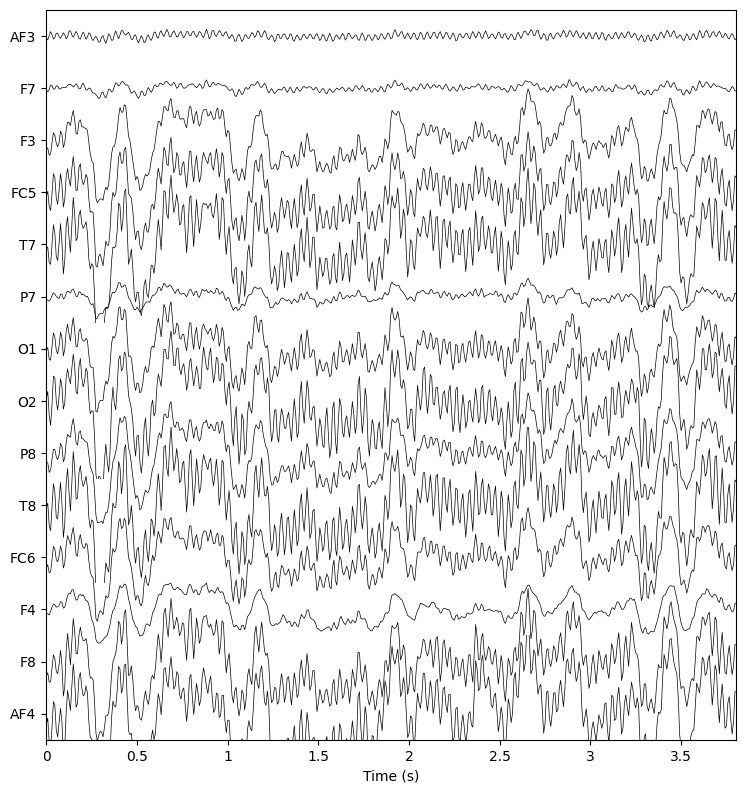

In [8]:
toTensor = transforms.ToTensor()
data = toTensor(eeg=dataset[10][0][0])["eeg"]

img = plot_signal(data,
                  channel_list=DREAMER_CHANNEL_LIST,
                  sampling_rate=128)

In [9]:
%pylab inline

from matplotlib import cm # to get a matplotlib.colors.ListedColormap
from matplotlib import style
style.use('fivethirtyeight')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [24]:
print("Dataset Shape: ", dataset[0][0][0].shape)
eeg = dataset[0][0][0][0].squeeze() # 1st trial, 1st channel, 1st chunk

print("EEG Shape: ", eeg.shape)
sr = 128 # sampling rate
time = np.arange(eeg.size)/sr
print('Sampling rate = %d samples/sec'%sr)

Dataset Shape:  (14, 488)
EEG Shape:  (488,)
Sampling rate = 128 samples/sec
